#### opencv-contrib

(venv) conda install pip

(venv) venvpath/bin/pip install opencv-contrib-python

In [13]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [14]:
def parse_frame(filename, form="mp4", frame_gap=24):
    vidcap = cv2.VideoCapture('.'.join([filename, form]))
    success,image = vidcap.read()
    count = 0
    success = True
    if os.path.exists("./" + filename) == False:
        os.mkdir("./"+filename)
    while success:
        if count % frame_gap == 0:
            cv2.imwrite("./" + filename + "/frame%d.jpg" % count, image)
            success,image = vidcap.read()
        count += 1
    return

In [15]:
## Remove comments to start parsing
## filename = "Diabetic Retinopathy Screen"
## parse_frame(filename)

In [16]:
"""
https://github.com/shekkizh/ImageProcessingProjects/blob/master/PythonProjects/ImageManipulation“
"""

class Stitcher:
    def stitch(self, images, ratio=1.0, reprojThresh=1.0):
        (imageB, imageA) = images
        (kpsA, featuresA) = self.detectAndDescribe(imageA)
        (kpsB, featuresB) = self.detectAndDescribe(imageB)
        M = self.matchKeypoints(kpsA, kpsB,
                                featuresA, featuresB, ratio, reprojThresh)
        if M is None:
            return None
        (matches, H, status) = M
        result = cv2.warpPerspective(imageA, H,
                                     (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
        result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB

        return result

    def detectAndDescribe(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        descriptor = cv2.xfeatures2d.SIFT_create()
        (kps, features) = descriptor.detectAndCompute(image, None)
        kps = np.float32([kp.pt for kp in kps])
        return kps, features


    def matchKeypoints(self, kpsA, kpsB, featuresA, featuresB,
                       ratio, reprojThresh):
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
        matches = []

        for m in rawMatches:
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
                matches.append((m[0].trainIdx, m[0].queryIdx))
        if len(matches) > 4:
            ptsA = np.float32([kpsA[i] for (_, i) in matches])
            ptsB = np.float32([kpsB[i] for (i, _) in matches])

            (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)
            return (matches, H, status)
        return None

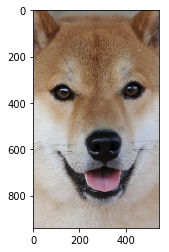

In [17]:
imageA = cv2.imread("shiba2.png")
imgA = imageA[:,:,::-1]
plt.imshow(imgA)

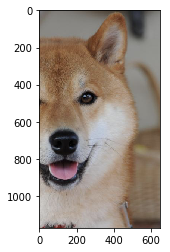

In [18]:
imageB = cv2.imread("shiba3.png")
imgB = imageB[:,:,::-1]
plt.imshow(imgB)

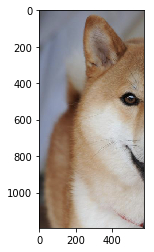

In [19]:
imageC = cv2.imread("shiba1.png")
imgC = imageC[:,:,::-1]
plt.imshow(imgC)

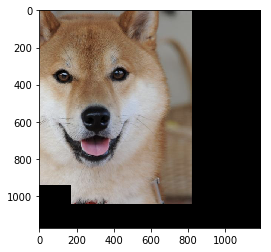

In [20]:
stitcher = Stitcher()
result = stitcher.stitch([imageA, imageB])
plt.imshow(result[:,:,::-1])

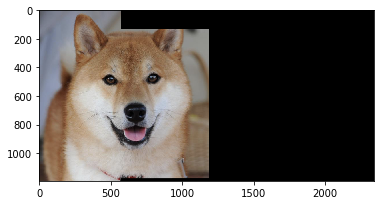

In [21]:
result = stitcher.stitch([result, imageC])
plt.imshow(result[:,:,::-1])
result = stitcher.stitch([imageC, result])
plt.imshow(result[:,:,::-1])